
## Bankruptcy prediction using Machine Learning techniques 



###Team

Pragya Sharma and Rohan Tiwari.




###Goal and Motivation

Bankruptcy prediction is important for creditors and investors to evaluate the likelihood that a firm may go bankrupt. It allows stakeholders to take corrective action to limit their economic losses.  Bankruptcy prediction is an early warning to not just investors but also public policy makers to take proactive steps to minimize the impact of bankruptcies. 
This problem requires high recall as classifying a bankrupt firm as non-bankrupt will confuse investors. For this problem, false alerts are fine but it should not miss any firms that are going to go bankrupt.

The project aims to determine the best performing model to predict bankruptcy for a given dataset (more about the data in the next section)



### Data

The dataset has 96 columns (95 features and 1 class attribute) and 6819 instances.  Data is available as data.csv file uploaded along with this project.








#### Data Source
The data is available at the following sources
https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?select=data.csv

From the UCI ML Repository - "The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange."


#### Structure

Each data instance (or data row) represents information about a particular firm. This information includes financial metrics and ratios that are useful to determine the health of a firm. Each instance is labeled as whether the firm went bankrupt (1) or not (0).  



#### Features

As mentioned in the previous section, each row or instance in the dataset contains information about the firm. This information is available as features (or columns) in the dataset. There are 95 features in all. These features are financial performance metrics about the firm.

Here are some example features in the dataset:

1. Current Ratio:  Quoting [investopedia](https://www.investopedia.com/terms/c/currentratio.asp): "The current ratio is a liquidity ratio that measures a company’s ability to pay short-term obligations or those due within one year. "
2. Liability/Total Assets: Quoting [investopedia](https://www.investopedia.com/terms/t/totaldebttototalassets.asp): "Total-debt-to-total-assets is a leverage ratio that defines the total amount of debt relative to assets owned by a company"
3. Total Asset Turnover:  Quoting [investopedia](https://www.investopedia.com/terms/a/assetturnover.asp): "The asset turnover ratio measures the value of a company's sales or revenues relative to the value of its assets"
4. Cash to Sales: "The cash flow to sales ratio reveals the ability of a business to generate cash flow in proportion to its sales volume" ( [ref](https://www.accountingtools.com/articles/cash-flow-to-sales-ratio))

#### Target Variable

The class attribute is called "Bankrupt?". It takes values 1 (Bankrupt) and 0 (Not Bankrupt).
The project aims to predict this class attribute i.e. it is our target variable.

### Methodology

*  Our experiments will first begin by importing the data. The data is available in the file data.csv and will be loaded as a DataFrame. 
*   Next the data will be analyzed to check for class distributions, null values, missing values and any other sanity checks. 
*   The next step will be to divide the data into training and test datasets using appropriate form of sampling
*   Several experiments will be run using different Machine Learning algorithms and their performance will be evaluated on test set after tuning hyperparameters. The hyperparameters will be tuned using cv=3 and with the scoring metric as "recall" as this problem prefers a high recall. The best model will be evaluated on the test set by comparing performance metrics like precision, recall, ROC AOC. Also, learning curves will be plotted with cv=3 to check overfitting. 


*   The results will be compared to determine the best performing algorithm.




### References
1. Undersampling bankruptcy prediction: Taiwan bankruptcy data. Haoming Wang and Xiangdong Liu. Published online 2021 Jul 1. doi: 10.1371/journal.pone.0254030.
2. Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.

### Statement of contributions by each team member

#### Rohan Tiwari
1. Preprocessing the data - identifying class imbalance, handling missing values, categorical features, feature scaling and all utility functions. 
2. Logistic Regression
3. Support Vector Machines
4. PCA
5. Support Vector Machines with PCA
6. Random Forest Classifier
7. AdaBoost Classifier
8. Gradient Boosting Classifier

#### Pragya Sharma
1. Data Visualization
2. Feature Selection using Random Forests 
3. Implementing Logistic Regression,SVM on above selected features
4. Extra- trees Classifier with and without feature selection.
4. Bagging and Pasting Classifier
5. k-NN Classifier
6. Hard and Soft Voting Classifier.

Both members worked equally on the summary section of the project. 


## Reading the data

This section reads the data from .csv file and splits it appropriately into training and test datasets.

In [ ]:
import os
import numpy as np
import pandas as pd
data = pd.read_csv("data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


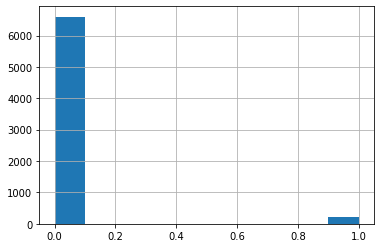

In [ ]:
#check distribution of bankrupt variable which is the target variable

data['Bankrupt?'].hist()

As seen above, the target variable is highly imbalanced as is also mentioned in the paper by Liang et. al. To better handle this imbalanced class data, stratified sampling is used.

Also, to take care of this class imbalance problem, class_weight='balanced' parameter is used in the classifiers.  This modifies the training procedure for classifiers to take into account the imbalance classes. By default, equal weights are assigned but with class_weight='balanced' weights are assigned during training that are inversely proportional to the frequency of classes. This penalizes the misclassification more for the minority class compared to the majority one. 

A training-test split of 80-20 is used in the stratified sampling implementation below.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Bankrupt?"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X_raw = strat_train_set.drop("Bankrupt?", axis=1)
y = strat_train_set["Bankrupt?"].copy()

X_test = strat_test_set.drop("Bankrupt?", axis=1)
y_test = strat_test_set["Bankrupt?"].copy()


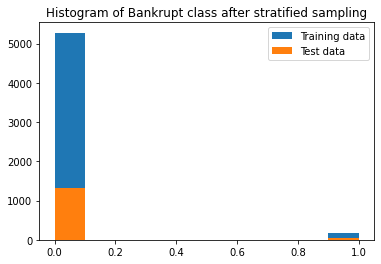

In [ ]:
import matplotlib.pyplot as plt

plt.hist(strat_train_set["Bankrupt?"], label="Training data")
plt.hist(strat_test_set["Bankrupt?"], label="Test data")
plt.title("Histogram of Bankrupt class after stratified sampling")
plt.legend()
plt.show()


## Exploratory Data Analysis

The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.

In [ ]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

1. The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


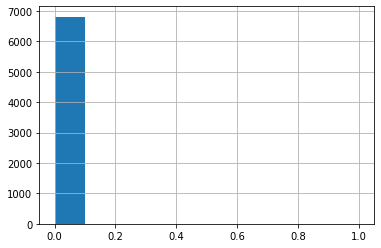

In [ ]:
print(data[[' Liability-Assets Flag','Bankrupt?']].value_counts())
data[' Liability-Assets Flag'].hist()

The "Liability-Assets" flag does not provide any strong evidence of correlation

2. The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

In [ ]:
print(data[[' Net Income Flag','Bankrupt?']].value_counts())

 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy. However the "Net Income Flag" does not provide any strong evidence of correlation between negative net income and bankruptcy as all the companies have same flag value

3. For sake of simplicity, analyzing top 9 positively and negatively correlated attributes

In [ ]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:9].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:9].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

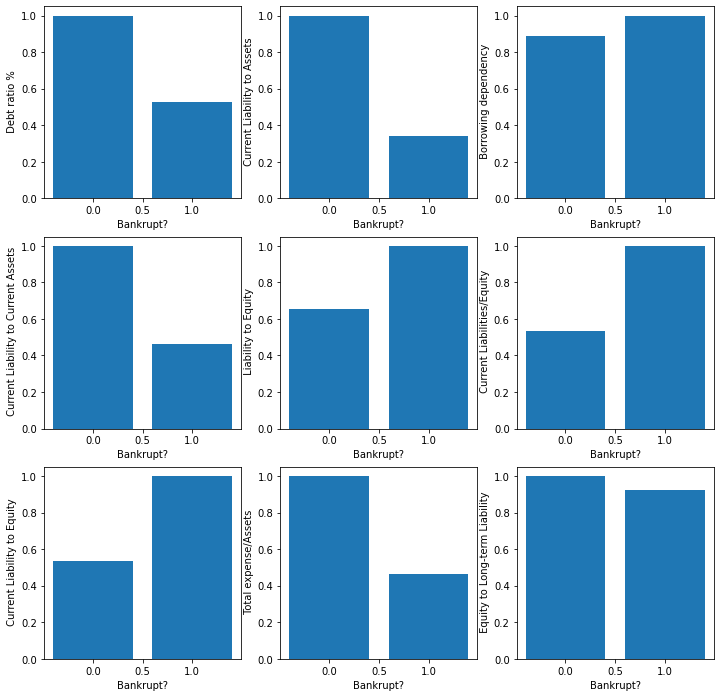

In [ ]:
xval = positive_corr.columns.tolist()[-1]
yval = positive_corr.columns.tolist()[:-1]
fix, axes = plt.subplots(ncols=3, figsize=(12,12), sharey=True)
for i in range(1,10):
    plt.subplot(3,3,i)  
    plt.bar(xval,yval[i-1],data = data)
    plt.xlabel(xval)
    plt.ylabel(yval[i-1])

Interesting observations: Debt Ratio- maximum debt ratio for a bankrupt firm is around 0.5. and for non bankrupt firms is 1. Ideally we would expect the other way around.
This phenomenon explains the graphs current liabiility to assets , total expenses/assets

However, borrowing dependency, current liability to equity is higher for bankrupt companies


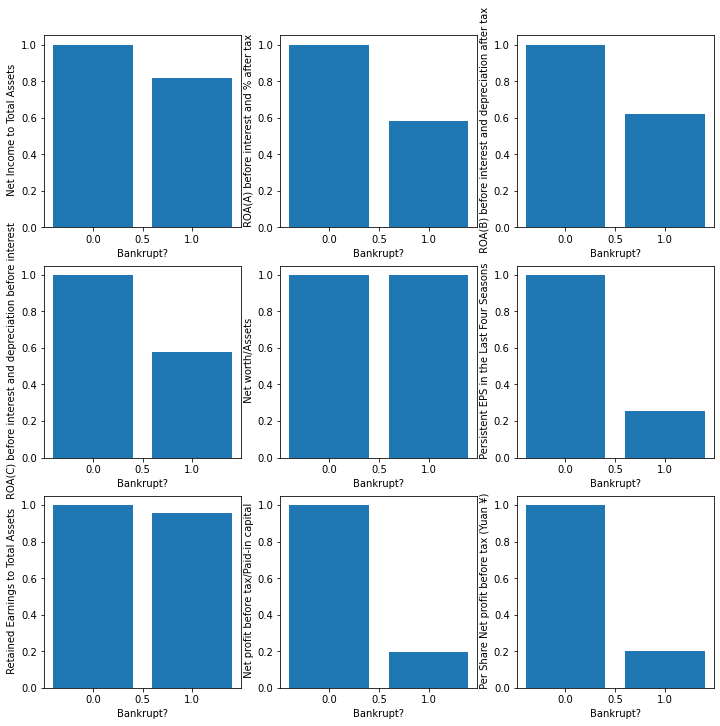

In [ ]:
xval = negative_corr.columns.tolist()[-1]
yval = negative_corr.columns.tolist()[:-1]
fix, axes = plt.subplots(ncols=3, figsize=(12,12), sharey=True)
for i in range(1,10):
    plt.subplot(3,3,i)  
    plt.bar(xval,yval[i-1],data = data)
    plt.xlabel(xval)
    plt.ylabel(yval[i-1])


These attributes show us that the more the assets and earnings of a company, the less likely is the organization to be bankrupt.

Let us check the relation of top 9 positive and negative correlation attributes among each other

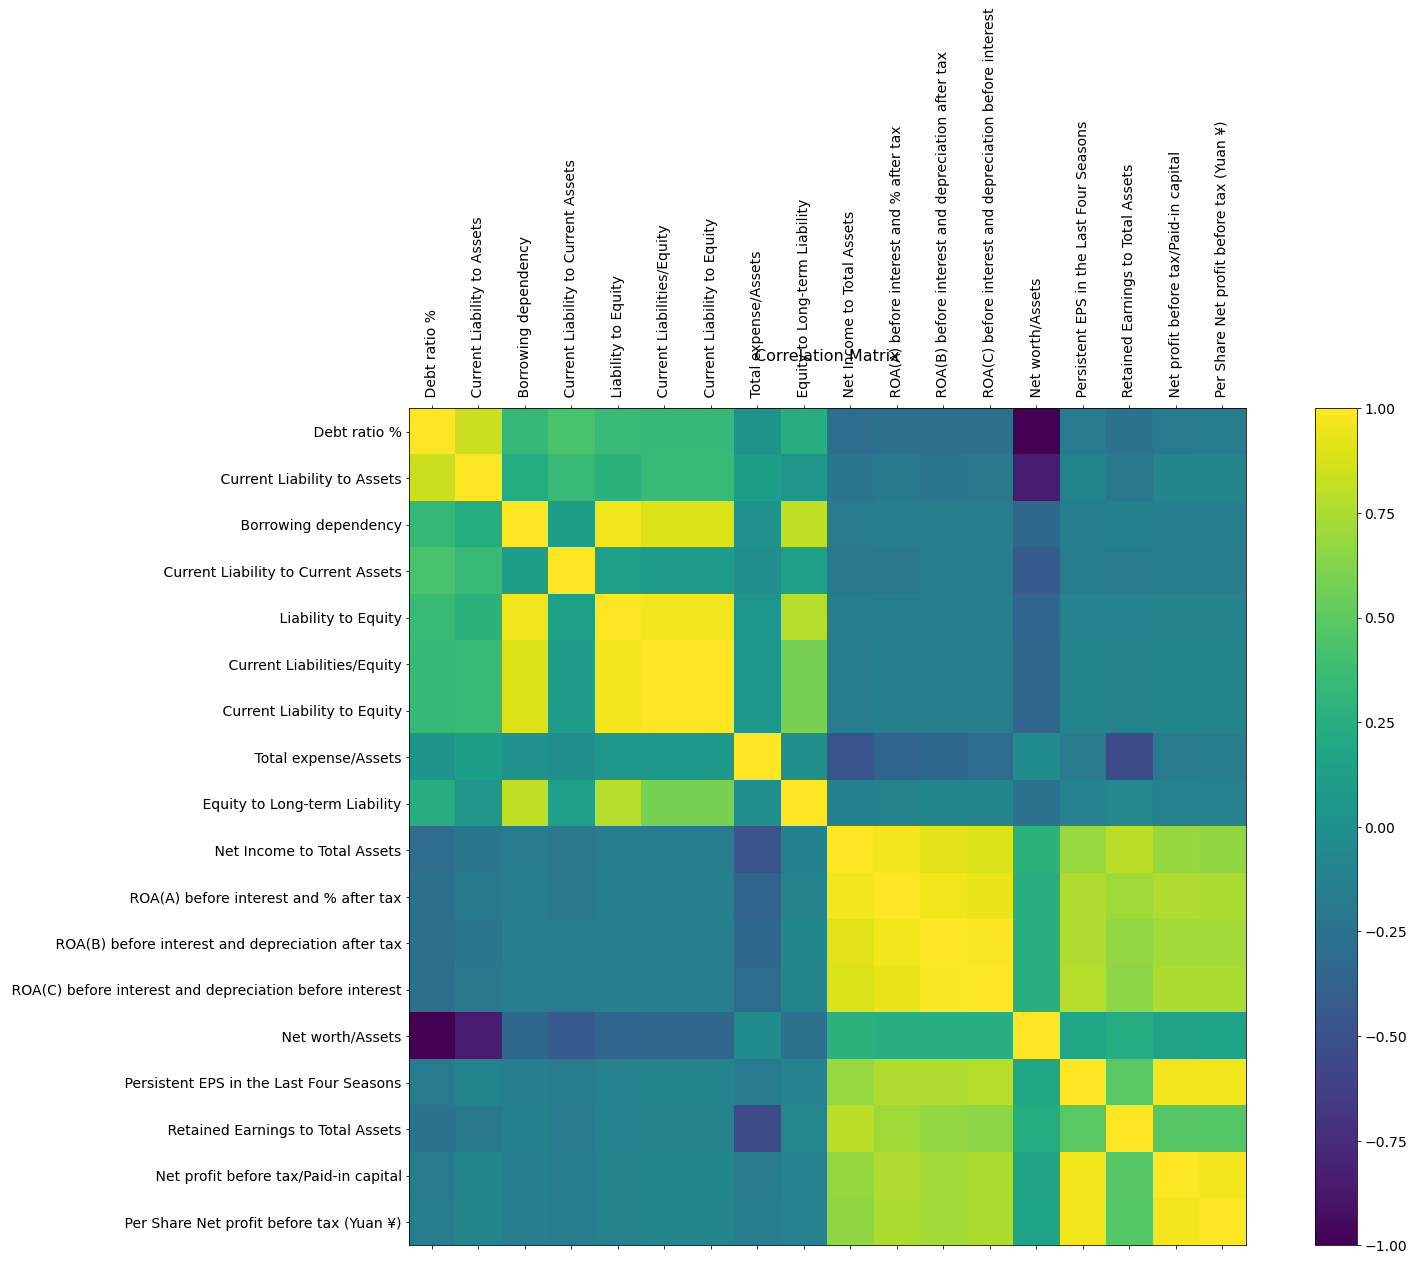

In [ ]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]

f = plt.figure(figsize=(25, 15))
plt.matshow(data[relation].corr(), fignum=f.number)
plt.xticks(range(data[relation].select_dtypes(['number']).shape[1]), data[relation].select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data[relation].select_dtypes(['number']).shape[1]), data[relation].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

There seems to be a significant relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.
This implies that feature selection is important for our analysis

## Preprocessing the data

This section applies appropriate preprocessing steps to the data to make it ready for training models.

### Handling Missing values

In [ ]:
X_raw.shape

(5455, 95)

In [ ]:
X_raw[X_raw.isnull().any(axis=1)].shape

(0, 95)

In [ ]:
X_raw[X_raw.isna().any(axis=1)].shape

(0, 95)

The training data has 5455 observations and 95 features. There is no missing values as shown by the checks for null and na values. 

### Categorical features

In [ ]:
X_raw.dtypes

 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 95, dtype: object

After checking the datatypes of all columns in the dataset it was determined that the columns are all numerical attributes and there is no categorical data. 

Implemented below are some utility functions for the project.

### Feature Scaling

All the features are scaled(standardized) using MinMaxScaler.
The transformed values are between 0 and 1 i.e. they are normalized same as Liang et. al. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scalar = MinMaxScaler()
Standard_X = minmax_scalar.fit(X_raw)
X_raw_transformed = Standard_X.transform(X_raw)
X = pd.DataFrame(X_raw_transformed, columns=X_raw.columns,index=X_raw.index)
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
318,0.481189,0.550153,0.528832,0.899832,0.898654,0.998980,0.797443,0.791807,0.257162,0.781616,...,0.806631,1.666653e-13,0.623661,0.899830,0.756845,0.164776,0.026814,0.565265,0.0,0.070742
5796,0.522808,0.590765,0.558633,0.901002,0.899628,0.999023,0.797454,0.791812,0.257087,0.781621,...,0.827723,1.098794e-13,0.624307,0.900998,0.760811,0.172086,0.026852,0.565433,0.0,0.022433
4454,0.514614,0.586895,0.551487,0.912184,0.910989,0.999103,0.797606,0.791933,0.257191,0.781718,...,0.828627,2.551415e-13,0.624714,0.912185,0.758880,0.165181,0.026791,0.565159,0.0,0.059856
2225,0.456508,0.536851,0.504459,0.895097,0.893925,0.998967,0.797390,0.791761,0.257093,0.781572,...,0.797846,3.156365e-13,0.624621,0.895093,0.756233,0.173438,0.027673,0.567450,0.0,0.020864
3249,0.376418,0.443197,0.412785,0.999014,0.997706,0.995856,0.794096,0.788379,0.257894,0.777918,...,0.756573,2.014380e-14,0.624242,0.999011,0.752978,0.163429,0.026791,0.565158,0.0,0.233952


In [ ]:
X_test_transformed = Standard_X.transform(X_test)
X_test = pd.DataFrame(X_test_transformed, columns=X_raw.columns,index=X_test.index)
X_test.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1244,0.490882,0.556149,0.536753,0.916182,0.914982,0.999043,0.797445,0.791801,0.257024,0.781609,...,0.805667,8.455800e-14,0.623746,0.916184,0.757387,0.171791,0.027273,0.566736,0.0,0.022839
6303,0.473195,0.547754,0.514374,0.900265,0.899087,0.999002,0.797424,0.791782,0.257078,0.781591,...,0.803448,1.984405e-13,0.623652,0.900264,0.756747,0.167366,0.027098,0.566292,0.0,0.035415
4712,0.543293,0.618513,0.596023,0.913863,0.912710,0.999043,0.797758,0.792117,0.257607,0.781922,...,0.839238,2.078966e-13,0.623843,0.913858,0.760748,0.167460,0.026816,0.565273,0.0,0.034892
3273,0.655558,0.692324,0.699164,0.947299,0.946059,0.999314,0.797808,0.792131,0.257096,0.781935,...,0.879037,1.159977e-13,0.624215,0.947295,0.763387,0.165097,0.026805,0.565222,0.0,0.061798
6430,0.436972,0.509976,0.477926,0.977962,0.976281,0.998738,0.797212,0.791509,0.257271,0.781240,...,0.782600,8.604712e-14,0.623938,0.977957,0.754912,0.163497,0.026709,0.564734,0.0,0.207130


### Utility Functions

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, f1_score
from sklearn.metrics import classification_report, confusion_matrix

column_names = ["Accuracy", "ROC AUC", "Precision", "Recall", "f1_score"]
training_stats_df = pd.DataFrame(columns=column_names)
test_stats_df = pd.DataFrame(columns=column_names)

def calculate_model_stats(estimator, X_data, y_data, model_name, training):
  global training_stats_df
  global test_stats_df 
  y_pred = estimator.predict(X_data)

  y_score = estimator.predict_proba(X_data)[:,1]      #this is the score
  if training == False: #Plot ROC for test set only    
    fpr, tpr, thresholds = roc_curve(y_data, y_score)
    roc_auc = roc_auc_score(y_data, y_score)
    print(" ROC AUC Score: ", roc_auc)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.title('ROC Curve')
    plt.grid(True)
    plt.show()

  accuracy = accuracy_score(y_data, y_pred)
  print("accuracy:", accuracy)
  roc_auc = roc_auc_score(y_data, y_score)
  print(" ROC AUC Score: ", roc_auc)
  precision = precision_score(y_data,y_pred)
  print(" Precision score: ", precision )
  recall = recall_score(y_data,y_pred)
  print ("Recall score:", recall)
  f1 = f1_score(y_data,y_pred)
  print ("F1 score:", f1)
  print('\n confusion matrix')
  print(confusion_matrix(y_data, y_pred))
  # print('\n Classification report')
  # print(classification_report(y_data, y_pred))


  if training == True:
    df = pd.DataFrame([[accuracy, roc_auc, precision, recall, f1]], columns=column_names, index=[model_name])    
    training_stats_df = training_stats_df.append(df)
    #training_stats_df = training_stats_df.drop_duplicates()
  else:
    df = pd.DataFrame([[accuracy, roc_auc, precision, recall, f1]], columns=column_names, index=[model_name])    
    test_stats_df = test_stats_df.append(df)
   # test_stats_df = test_stats_df.drop_duplicates()



In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,
                                                                        X, y, cv=3,return_times=True)
  #
  # Calculate training and test mean and std
  #
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  #
  # Plot the learning curve
  #
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  #plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  #plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title('Learning Curve')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='upper right')
  plt.show()

## Logistic Regression

We start with logistic regression on the bankruptcy data. This is a binary classifier that predicts the probability of a class. Instead of outputting the prediction directly it outputs the logistic of the result. The logistic is a sigmoid function which takes values between 0 and 1.  The model is trained by optimizing parameters such that it predicts higher probabilities for positive instances and lower for negative instances.

#### Training and hyperparameter tuning

From Sklearn documentation:
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

log_reg = LogisticRegression(random_state=42, class_weight='balanced')
params = {"C": uniform(0.1, 100), "solver":['liblinear'], 
          'penalty':['l1','l2']}
rnd_search_log_reg = RandomizedSearchCV(log_reg, params, n_jobs=-1, cv=3, scoring="recall", n_iter=10, random_state=42)
rnd_search_log_reg.fit(X,y)
print("best params are: ", rnd_search_log_reg.best_params_)
print("best estimator:", rnd_search_log_reg.best_estimator_)


best params are:  {'C': 0.17787658410143284, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator: LogisticRegression(C=0.17787658410143284, class_weight='balanced',
                   random_state=42, solver='liblinear')


#### Evaluation over training set

In [ ]:
print("***Performance stats for logistic regression over training data***")
calculate_model_stats(rnd_search_log_reg.best_estimator_, X,y, "log reg", True)

***Performance stats for logistic regression over training data***
accuracy: 0.8560953253895509
 ROC AUC Score:  0.9333099416211749
 Precision score:  0.16575192096597147
Recall score: 0.8579545454545454
F1 score: 0.2778288868445262

 confusion matrix
[[4519  760]
 [  25  151]]


The recall is high on training set

#### Evaluation over test set

***Performance stats for logistic regression over test data***
 ROC AUC Score:  0.934228650137741


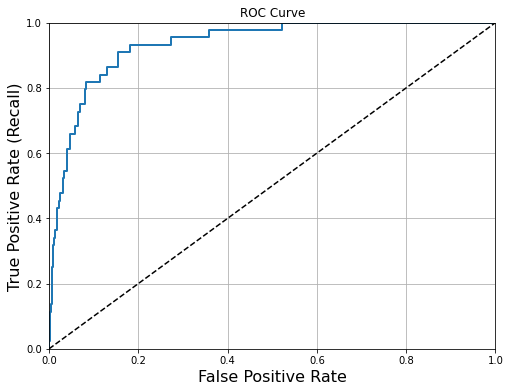

accuracy: 0.8585043988269795
 ROC AUC Score:  0.934228650137741
 Precision score:  0.1688888888888889
Recall score: 0.8636363636363636
F1 score: 0.28252788104089216

 confusion matrix
[[1133  187]
 [   6   38]]


In [ ]:
print("***Performance stats for logistic regression over test data***")
calculate_model_stats(rnd_search_log_reg.best_estimator_, X_test, y_test,"log reg", False)

Recall is high on the test set as well. ROC AUC is high over the test set.

#### Learning Curves

We plot learning curves using the best model on the training set, with a cross-validation of 3

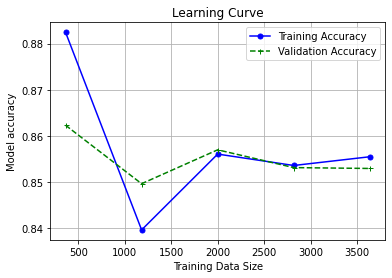

In [ ]:
plot_learning_curve(rnd_search_log_reg.best_estimator_, X,y)

There is very little overfitting - infact at lower training sizes the classifier outperforms training set on the validation set

## Support Vector Machines

SVMs are used as classifiers to separate the classes with the widest possible "street" as possible. It tries to minimize the number of margin violations. 

This section trains a SVM classifier on the training data.  The best hyperparameters are searched using CV=3.

Linear and Gaussian kernels are tried on the training data.

#### Training and hyperparameter tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear"], "gamma": reciprocal(0.001, 100)}
clf = SVC(random_state=42, probability=True, class_weight='balanced')
rnd_search_svm = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, scoring="recall", n_iter=10, random_state=42)
rnd_search_svm.fit(X,y)
print("best params are: ", rnd_search_svm.best_params_)
print("best estimator is:", rnd_search_svm.best_estimator_)



best params are:  {'C': 33.47086111390219, 'gamma': 0.005180051644243019, 'kernel': 'rbf'}
best estimator is: SVC(C=33.47086111390219, class_weight='balanced', gamma=0.005180051644243019,
    probability=True, random_state=42)


#### Evaluation over training set

In [ ]:
print("***Performance stats for SVM over training data***")
calculate_model_stats(rnd_search_svm.best_estimator_, X,y, "svm", True)


***Performance stats for SVM over training data***
accuracy: 0.8570119156736938
 ROC AUC Score:  0.940998531918924
 Precision score:  0.17316017316017315
Recall score: 0.9090909090909091
F1 score: 0.2909090909090909

 confusion matrix
[[4515  764]
 [  16  160]]


The recall score is high on the training set but let us check on test set.

#### Evaluation over test set

Next step is to evaluate the performance of the best SVM classifer on the test dataset. 


***Performance stats for SVM over test data***
 ROC AUC Score:  0.9371384297520661


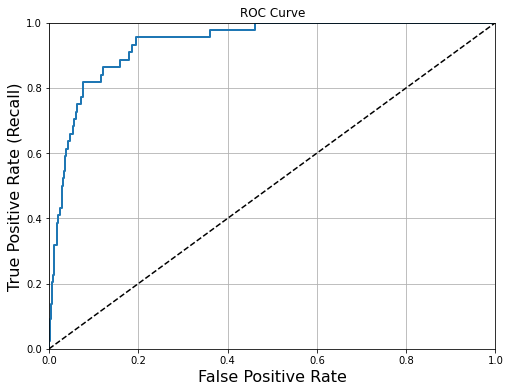

accuracy: 0.8570381231671554
 ROC AUC Score:  0.9371384297520661
 Precision score:  0.16740088105726872
Recall score: 0.8636363636363636
F1 score: 0.28044280442804426

 confusion matrix
[[1131  189]
 [   6   38]]


In [ ]:
print("***Performance stats for SVM over test data***")
calculate_model_stats(rnd_search_svm.best_estimator_, X_test, y_test, "svm", False)

Recall is high on the test set as well. The test set shows a high ROC AUC score.

#### Learning Curves

Learning curves are plotted on training set using cv=3.

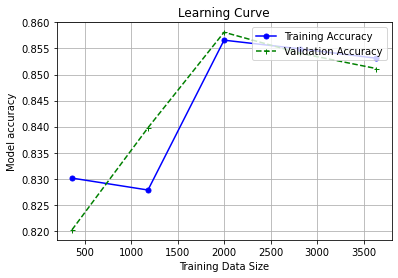

In [ ]:
plot_learning_curve(rnd_search_svm.best_estimator_, X,y)

There is generally little to none overfitting. The accuracy on the validation set tends to be higher tha training set almost throughout.

##PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=0.95)
X_reduced_pca=pca.fit_transform(X)
X_recoverd_pca = pca.inverse_transform(X_reduced_pca)
mean_squared_error(X, X_recoverd_pca)

0.0004940635018922932

In [ ]:
pca.explained_variance_ratio_

array([0.16875855, 0.14554589, 0.10771396, 0.0871236 , 0.08584253,
       0.07774439, 0.06455178, 0.04941605, 0.04828937, 0.03704018,
       0.02501054, 0.01816285, 0.01288172, 0.01181515, 0.0078574 ,
       0.00651295])

In [ ]:
pca.n_components_

16

16 components are able to cover 95% of the variance.

## Support Vector Machines with PCA

PCA performs feature selection on the input dataset. PCA projects the high dimensional data onto an axis such that largest amount of  variance is accounted for. It then identifies another axis orthogonal to the first one which accounts for the second largest amount of variance and so on. Our dataset has 95 attributes, so we explore if we can get similar model performance with lesser number of dimensions. 

PCA is  performed on the input dataset with an explained variance ratio of 95%.

#### Training and hyperparameter tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear"], "gamma": reciprocal(0.001, 100)}
clf = SVC(random_state=42, probability=True ,class_weight="balanced")
rnd_search_svm_pca = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, scoring="recall", n_iter=10, random_state=42)
rnd_search_svm_pca.fit(X_reduced_pca,y)
print("best estimator is: ", rnd_search_svm_pca.best_estimator_)
print("best params are: ", rnd_search_svm_pca.best_params_)

best estimator is:  SVC(C=2.1584494295802448, class_weight='balanced', gamma=70.72114131472235,
    kernel='linear', probability=True, random_state=42)
best params are:  {'C': 2.1584494295802448, 'gamma': 70.72114131472235, 'kernel': 'linear'}


#### Evaluation over training set

In [ ]:
print("***Performance stats for SVM (with pca) over training data***")
calculate_model_stats(rnd_search_svm_pca.best_estimator_,X_reduced_pca,y, "svm (with pca)", True)

***Performance stats for SVM (with pca) over training data***
accuracy: 0.8386801099908341
 ROC AUC Score:  0.928882019666259
 Precision score:  0.15422396856581533
Recall score: 0.8920454545454546
F1 score: 0.2629815745393635

 confusion matrix
[[4418  861]
 [  19  157]]


The numbers using PCA are pretty similar to what we saw for SVM without PCA over training data. Precision drops slightly but for this problem recall is more important. This means focussing on PCs does not reduce model performance over training data.


#### Evaluation over test set

Next step is to evaluate the performance of the best SVM classifer on the test dataset. 
Note that pca is not recalculated and fit over the test set. The already fit pca over the training set is used to perform a transform over the testset. This avoids data leaking (as the combined dataset isn't fitted with pca) and it also avoids introducing errors by fitting on train/test separately as the resulting components may have different directions in that case.


***Performance stats for SVM (with pca) over test data***
 ROC AUC Score:  0.9289944903581266


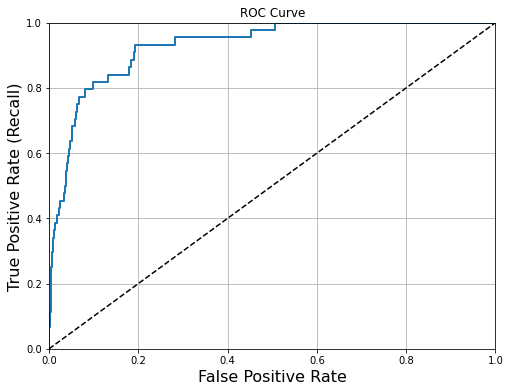

accuracy: 0.843841642228739
 ROC AUC Score:  0.9289944903581266
 Precision score:  0.1522633744855967
Recall score: 0.8409090909090909
F1 score: 0.2578397212543554

 confusion matrix
[[1114  206]
 [   7   37]]


In [ ]:
X_test_reduced = pca.transform(X_test)

print("***Performance stats for SVM (with pca) over test data***")
calculate_model_stats(rnd_search_svm_pca.best_estimator_,X_test_reduced,y_test, "svm (with pca)", False)

The numbers with PCA over test data are similar to what was seen with SVM without PCA over test data. PCA does not affect performance which means using lesser number of features can yield the same performance.  ROC AUC remains high with PCA.

#### Learning Curves

Learning curves are plotted on training dataset with cv=3.

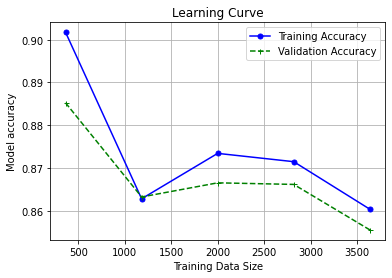

In [ ]:
plot_learning_curve(rnd_search_svm_pca.best_estimator_, X,y)

There is some overfitting which wasn't seen without PCA in the previous section. So, using PCA may not be ideal afterall.

## Random Forest Classifier

Random Forest is based on Bagging. Bagging stands for boostrap aggregation. Bagging samples the given training set with replacement and trains individual models. The final ensemble model's output is based on majority voting. Random Forest randomly selects a set of training instances (with replacement) and trains a decision tree. 

RandomForestClassifier is tuned using GridSearchCv over n_estimators=[500, 750, 100], max_leaf_nodes = [16,32, 64] and ccp_alpha = [0.0, 0.005, 0.01] over cv=10.  Ccp_alpha is used to prune the classifier to reduce overfitting.  This might increase training error but reduce testing error which is what we want.  By default, there is no pruning done so trees could keep growing which may lead to overfitting. Setting a value for ccp_alpha avoids that. We do a GridSearch for a range of values of ccp_alpha.

#### Training and hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rndforest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [500, 750, 1000], "max_leaf_nodes" : [16, 32, 64], 
          "class_weight":["balanced"], "ccp_alpha" :np.arange(0.0, 0.01, 0.005)}
grid_search_rnd_clf = GridSearchCV(rndforest_clf, params, n_jobs=-1, cv=3, scoring="recall")
grid_search_rnd_clf.fit(X,y)
print("best params from grid search for random forest classifier are: ", grid_search_rnd_clf.best_params_)
print("Best estimator is:", grid_search_rnd_clf.best_estimator_)


best params from grid search for random forest classifier are:  {'ccp_alpha': 0.005, 'class_weight': 'balanced', 'max_leaf_nodes': 16, 'n_estimators': 1000}
Best estimator is: RandomForestClassifier(ccp_alpha=0.005, class_weight='balanced',
                       max_leaf_nodes=16, n_estimators=1000, n_jobs=-1,
                       random_state=42)


#### Evaluation over training set

In [ ]:
print("***Performance stats for RandomForestClassifier over training data***")
calculate_model_stats(grid_search_rnd_clf.best_estimator_,X,y, "rnd_forest", True)

***Performance stats for RandomForestClassifier over training data***
accuracy: 0.918423464711274
 ROC AUC Score:  0.9700065869913378
 Precision score:  0.2747068676716918
Recall score: 0.9318181818181818
F1 score: 0.4243208279430789

 confusion matrix
[[4846  433]
 [  12  164]]


#### Evaluation over test set

***Performance stats for RandomForestClassifier over test data***
 ROC AUC Score:  0.9384986225895317


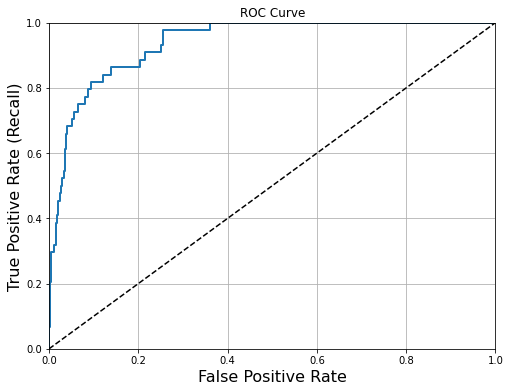

accuracy: 0.9164222873900293
 ROC AUC Score:  0.9384986225895317
 Precision score:  0.2426470588235294
Recall score: 0.75
F1 score: 0.36666666666666664

 confusion matrix
[[1217  103]
 [  11   33]]


In [ ]:
print("***Performance stats for RandomForestClassifier over test data***")
calculate_model_stats(grid_search_rnd_clf.best_estimator_,X_test,y_test, "rnd_forest", False)

Recall is high for randomforestclassifier over the test set but not as high as logistic regression and SVM on bankrupt categories.  ROC AUC is high.

#### Learning Curves

Learning curves are plotted on training dataset with cv=3.

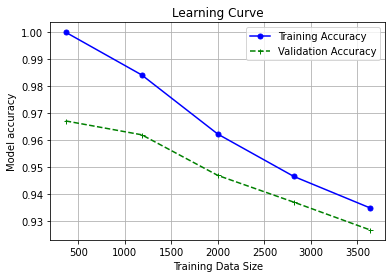

In [ ]:
plot_learning_curve(grid_search_rnd_clf.best_estimator_, X,y)

There is overfitting. This looks the worst out of SVMs and Logistic regression as the model accuracy is on the lower side for both training and validation sets.

## AdaBoost Classifier

Next we train an AdaBoost Classifier on our data. Adaboost is an ensemble method. It starts with a base classifier e.g. DecisionTree. It then assigns higher weights to instances that were misclassified by the first model and uses these weights to train the next model and so on. The process continues till a low error is achieved. The last step is to build an ensemble from all these trained individual models. 

#### Training and hyperparameter tuning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, max_leaf_nodes = 64, class_weight="balanced", ccp_alpha=0.005), n_estimators=500,
    algorithm="SAMME.R", learning_rate=1.0, random_state = 42)

params = {"base_estimator__criterion" : ["gini"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [500]
             }

grid_search_adaboost = GridSearchCV(ada_clf, 
                              params, n_jobs=-1, cv=3, scoring="recall")
grid_search_adaboost.fit(X, y)
print("best estimator is: ", grid_search_adaboost.best_estimator_)
print("best params are: ", grid_search_adaboost.best_params_)

best estimator is:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.005,
                                                         class_weight='balanced',
                                                         max_depth=2,
                                                         max_leaf_nodes=64,
                                                         splitter='random'),
                   n_estimators=500, random_state=42)
best params are:  {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'n_estimators': 500}


#### Evaluation over training set

In [ ]:
print("***Performance stats for AdaBoost Classifier over training data***")
calculate_model_stats(grid_search_adaboost.best_estimator_,X,y, "ada_boost", True)

***Performance stats for AdaBoost Classifier over training data***
accuracy: 0.9479376718606782
 ROC AUC Score:  0.9932397234324681
 Precision score:  0.3826086956521739
Recall score: 1.0
F1 score: 0.5534591194968553

 confusion matrix
[[4995  284]
 [   0  176]]


AdaBoostClassifier gives perfect scores but we should check over the test set.

#### Evaluation over test set

***Performance stats for AdaBoost Classifier over test data***
 ROC AUC Score:  0.909228650137741


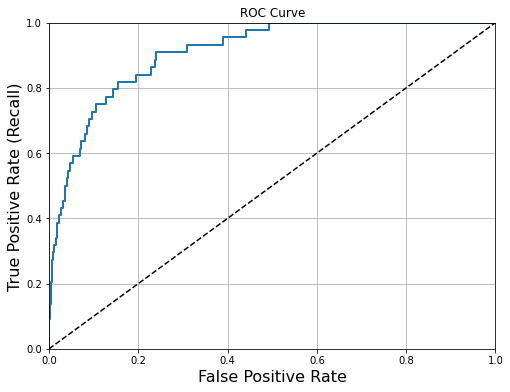

accuracy: 0.9296187683284457
 ROC AUC Score:  0.909228650137741
 Precision score:  0.25
Recall score: 0.5909090909090909
F1 score: 0.35135135135135137

 confusion matrix
[[1242   78]
 [  18   26]]


In [ ]:
print("***Performance stats for AdaBoost Classifier over test data***")
calculate_model_stats(grid_search_adaboost.best_estimator_,X_test,y_test, "ada_boost", False)

Not so good over test data. The recall is low compared to SVM and logistic regression. ROC AUC is lowest out of all the models seen so far.

#### Learning Curves

Learning curves are plotted on the training dataset using cv=3.

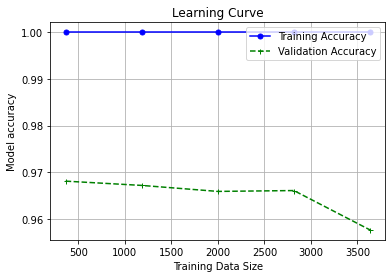

In [ ]:
plot_learning_curve(grid_search_adaboost.best_estimator_, X,y)

There is gap between the curves and it does not reduce with adding training instances. The model is  overfitting and is worse than SVM and logistic regression and also random forest. 

## Gradient Boosting Classifier

This is similar to the AdaBoost Classifier except that instead of tweaking weights at every step and training models, it trains models on the residual errors. 

Please note that there is currently no way to add class_weight forr GB classifier in SKlearn. GradientBoostingClassifier let's us assign weights to each observation using sample_weights parameter and not to classes.

#### Training and hyperparameter tuning

In [ ]:
from sklearn.utils import class_weight
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(max_depth=2, learning_rate=1.0, random_state=42)

params = {'max_leaf_nodes': [32,64], 
          "n_estimators": [250, 500, 750],
          "ccp_alpha" :np.arange(0.0, 0.01, 0.005)}
from sklearn.utils.class_weight import compute_sample_weight
weights = compute_sample_weight(class_weight='balanced', y=y)
grid_search_gboost = GridSearchCV(grad_boost_clf, params, n_jobs=-1, cv=3, scoring="recall")
grid_search_gboost.fit(X, y,  sample_weight=weights)
print("best estimator is: ", grid_search_gboost.best_estimator_)
print("best params are: ", grid_search_gboost.best_params_)

best estimator is:  GradientBoostingClassifier(ccp_alpha=0.005, learning_rate=1.0, max_depth=2,
                           max_leaf_nodes=32, n_estimators=250,
                           random_state=42)
best params are:  {'ccp_alpha': 0.005, 'max_leaf_nodes': 32, 'n_estimators': 250}


#### Evaluation over training set

In [ ]:
print("***Performance stats for Gradient Boosting Classifier over training data***")
calculate_model_stats(grid_search_gboost.best_estimator_,X,y, "grad_boost", True)

***Performance stats for Gradient Boosting Classifier over training data***
accuracy: 0.9024747937671861
 ROC AUC Score:  0.9399286839794039
 Precision score:  0.23030303030303031
Recall score: 0.8636363636363636
F1 score: 0.36363636363636365

 confusion matrix
[[4771  508]
 [  24  152]]


This is too good over the training set

#### Evaluation over test set

***Performance stats for Gradient Boosting Classifier over test data***
 ROC AUC Score:  0.9352014462809917


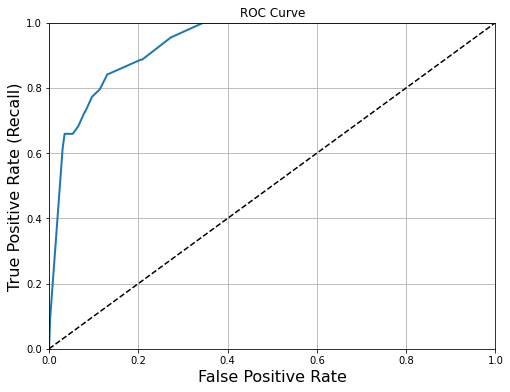

accuracy: 0.8995601173020528
 ROC AUC Score:  0.9352014462809917
 Precision score:  0.2111801242236025
Recall score: 0.7727272727272727
F1 score: 0.33170731707317075

 confusion matrix
[[1193  127]
 [  10   34]]


In [ ]:
print("***Performance stats for Gradient Boosting Classifier over test data***")
calculate_model_stats(grid_search_gboost.best_estimator_,X_test,y_test, "grad_boost", False)

Similar to AdaBoost, this gives perfect scores on training data but does not perform as well on test data. It has good recall on test data.  ROC AUC is higher than adaboost but not good as other models seen so far.

#### Learning Curves

Learning curves are plotted on training set using cv=3

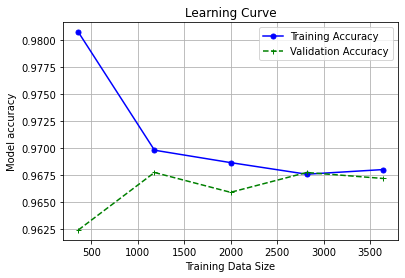

In [ ]:
plot_learning_curve(grid_search_gboost.best_estimator_, X,y)

There is some overfitting but not too bad.

## Feature Selection using Random Forests

Another great quality of random Forests- 
measure the relative importance of each feature.

Measures feature importance by looking at how much the tree node that that use that feature reduce impurity on average

The more a feature decreases the impurity, the more important the feature is.

#### Training model and extracting features  

In [ ]:
fs_rndf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [150,250,500], "ccp_alpha" :np.arange(0.0, 0.01, 0.005)}
fs_grid_search_rnd_clf = GridSearchCV(fs_rndf_clf, params, n_jobs=-1, cv=5, scoring="accuracy")
fs_grid_search_rnd_clf.fit(X,y)
print("best params from grid search for random forest classifier are: ", fs_grid_search_rnd_clf.best_params_)
print("Best estimator is:", fs_grid_search_rnd_clf.best_estimator_)

best params from grid search for random forest classifier are:  {'ccp_alpha': 0.0, 'n_estimators': 250}
Best estimator is: RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)


In [ ]:
model = fs_grid_search_rnd_clf.best_estimator_
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': model.feature_importances_}).sort_values('importance', ascending = False)
feature_importances.head(15)

,feature,importance
89,Net Income to Stockholder's Equity,0.033052
18,Persistent EPS in the Last Four Seasons,0.028376
39,Borrowing dependency,0.028321
42,Net profit before tax/Paid-in capital,0.023891
56,Cash/Total Assets,0.021403
91,Degree of Financial Leverage (DFL),0.021046
15,Net Value Per Share (B),0.020289
34,Interest Expense Ratio,0.020213
22,Per Share Net profit before tax (Yuan ¥),0.019469
64,Working Capital/Equity,0.019311


We notice a a lot of new features appear in the list that did not depict high correlation with the target variable in visualization. This emphasizes the importance of feature selection

In [ ]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 3 features with 0.0 importance


,feature,importance
52,Allocation rate per person,0.000024
20,Revenue Per Share (Yuan ¥),0.000021
50,Revenue per person,0.000000
93,Net Income Flag,0.000000
57,Quick Assets/Current Liability,0.000000


In [ ]:
#Citation: Code taken from https://www.kaggle.com/code/willkoehrsen/introduction-to-feature-selection/notebook
def plot_feature_importances(data,n,threshold):    
    plt.rcParams['font.size'] = 10
    
    # Sort features according to importance
    df = data.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (15, 20))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:n]))), 
            df['importance_normalized'].head(n), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:n]))))
    ax.set_yticklabels(df['feature'].head(n))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (6, 4))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

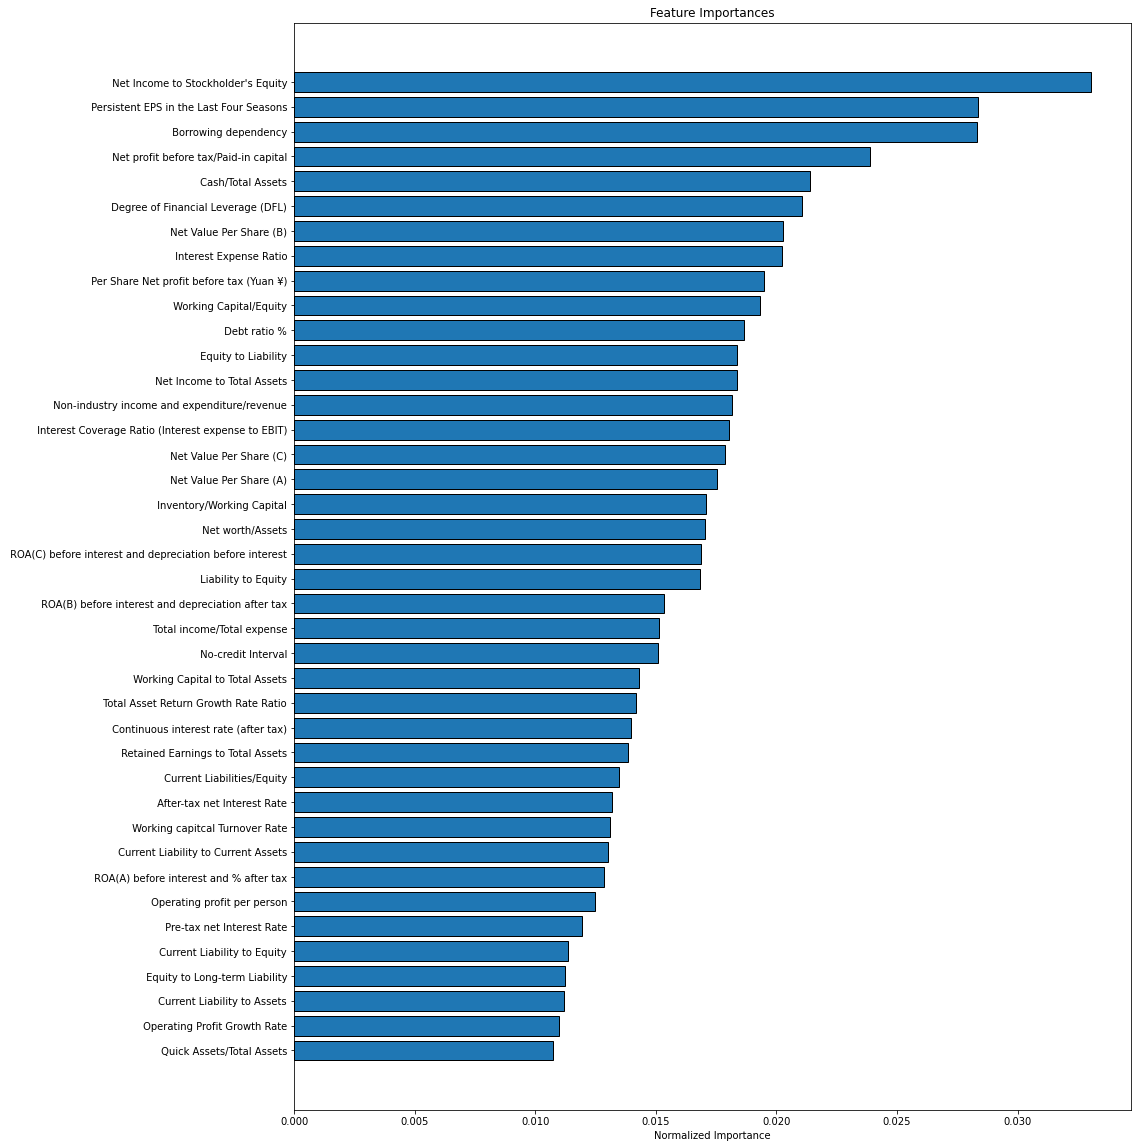

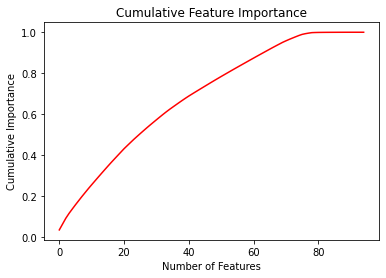

70 features required for 0.95 of cumulative importance


In [ ]:
threshold = 0.95
norm_feature_importances = plot_feature_importances(feature_importances, 40, threshold)

We decide to keep the features that have 95% of cumulative importance

In [ ]:
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
fs_X = X[features_to_keep]
fs_X_test = X_test[features_to_keep]

## 1. Logistic Regression on selected features

#### Training and hyperparameter tuning

In [ ]:
fs_log_reg = LogisticRegression(random_state=42,max_iter = 1000)
params = {"C": uniform(0.1, 10), "solver":['liblinear'],"class_weight":['balanced'],
          'penalty':['l1', 'l2']}
fs_rnd_search_log_reg = RandomizedSearchCV(fs_log_reg, params, n_jobs=-1, cv=3, scoring="recall", n_iter=10, random_state=42)
fs_rnd_search_log_reg.fit(fs_X,y)
print("best params are: ", fs_rnd_search_log_reg.best_params_)
print("best estimator:", fs_rnd_search_log_reg.best_estimator_)

best params are:  {'C': 0.6808361216819946, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
best estimator: LogisticRegression(C=0.6808361216819946, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')


#### Evaluation over training set

In [ ]:
print("***Performance stats for Logistic Regression over training data reduced***")
calculate_model_stats(fs_rnd_search_log_reg.best_estimator_,fs_X,y, "fs_logreg", True)

***Performance stats for Logistic Regression over training data reduced***
accuracy: 0.8590284142988084
 ROC AUC Score:  0.9370996142520105
 Precision score:  0.1723756906077348
Recall score: 0.8863636363636364
F1 score: 0.28862164662349676

 confusion matrix
[[4530  749]
 [  20  156]]


#### Evaluation over test set

***Performance stats for Logistic Regression over testing data reduced***
 ROC AUC Score:  0.9356577134986226


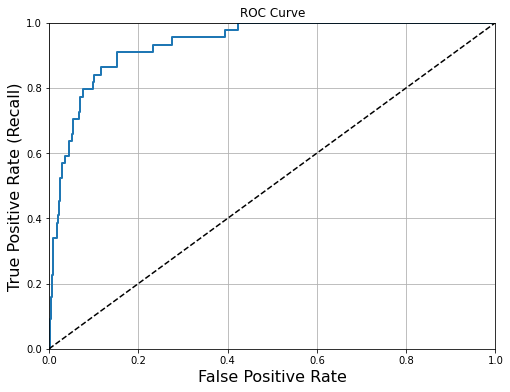

accuracy: 0.8680351906158358
 ROC AUC Score:  0.9356577134986226
 Precision score:  0.1792452830188679
Recall score: 0.8636363636363636
F1 score: 0.29687499999999994

 confusion matrix
[[1146  174]
 [   6   38]]


In [ ]:
print("***Performance stats for Logistic Regression over testing data reduced***")
calculate_model_stats(fs_rnd_search_log_reg.best_estimator_, fs_X_test,y_test, "fs_logreg", False)

In comparison to the logistic regression model on the full data set, we can see that the accuracy has improved, recall remains the same that implies precision has improved

#### Learning Curves

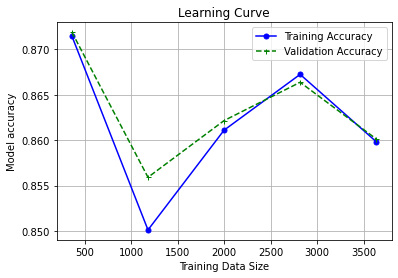

In [ ]:
plot_learning_curve(fs_rnd_search_log_reg.best_estimator_,fs_X,y)

Accuracy lines converge towards the end

## 2. SVM Classification on selected features

#### Training and hyperparameter tuning

In [ ]:
params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear"], "gamma": reciprocal(0.001, 100)}
fs_clf = SVC(random_state=42, probability=True, class_weight='balanced')
fs_rnd_search_svm = RandomizedSearchCV(fs_clf, params, n_jobs=-1, cv=3, scoring="recall", n_iter=10, random_state=42)
fs_rnd_search_svm.fit(fs_X,y)
print("best params are: ", fs_rnd_search_svm.best_params_)
print("best estimator is:", fs_rnd_search_svm.best_estimator_)


best params are:  {'C': 33.47086111390219, 'gamma': 0.005180051644243019, 'kernel': 'rbf'}
best estimator is: SVC(C=33.47086111390219, class_weight='balanced', gamma=0.005180051644243019,
    probability=True, random_state=42)


#### Evaluation over training set

In [ ]:
print("***Performance stats for SVM Classifier over training data reduced***")
calculate_model_stats(fs_rnd_search_svm.best_estimator_,fs_X,y, "fs_svm_red", True)

***Performance stats for SVM Classifier over training data reduced***
accuracy: 0.8504124656278643
 ROC AUC Score:  0.937500538152887
 Precision score:  0.16527196652719664
Recall score: 0.8977272727272727
F1 score: 0.27915194346289746

 confusion matrix
[[4481  798]
 [  18  158]]


#### Evaluation over test set

***Performance stats for SVM over testing data reduced***
 ROC AUC Score:  0.9376377410468321


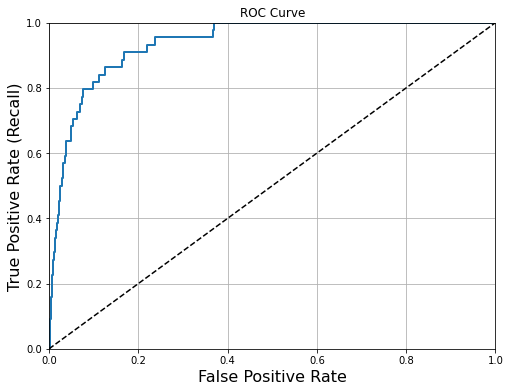

accuracy: 0.8563049853372434
 ROC AUC Score:  0.9376377410468321
 Precision score:  0.16666666666666666
Recall score: 0.8636363636363636
F1 score: 0.2794117647058823

 confusion matrix
[[1130  190]
 [   6   38]]


In [ ]:
print("***Performance stats for SVM over testing data reduced***")
calculate_model_stats(fs_rnd_search_svm.best_estimator_, fs_X_test,y_test, "fs_svm", False)

The overall accuracy,recall and precision remains the same. 

#### Learning Curves

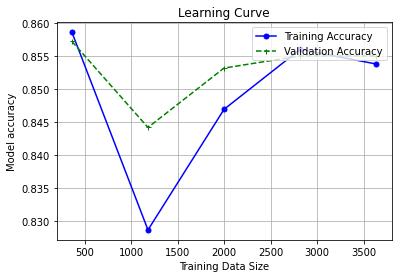

In [ ]:
plot_learning_curve(fs_rnd_search_svm.best_estimator_,fs_X,y)

Again, we notice the lines converge towards the end

## Extra- trees Classifier

ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.

2 major differences when compared to random forests:

Builds multiple trees with bootstrap = False by default, which means it samples without replacement

Nodes are split based on random splits among a random subset of the features selected at every node


#### Training and hyperparameter tuning

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extrtrees_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [500, 750, 1000], "max_leaf_nodes" : [16, 32, 64], 
          "class_weight":["balanced"], "ccp_alpha" :np.arange(0.0, 0.01, 0.005)}
grid_search_extrtrees_clf = GridSearchCV(extrtrees_clf, params, n_jobs=-1, cv=5, scoring="accuracy")
grid_search_extrtrees_clf.fit(X,y)
print("best params from grid search for extra-trees classifier are: ", grid_search_extrtrees_clf.best_params_)
print("Best estimator is:", grid_search_extrtrees_clf.best_estimator_)

best params from grid search for extra-trees classifier are:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_leaf_nodes': 64, 'n_estimators': 1000}
Best estimator is: ExtraTreesClassifier(class_weight='balanced', max_leaf_nodes=64,
                     n_estimators=1000, n_jobs=-1, random_state=42)


#### Evaluation over training set

In [ ]:
print("***Performance stats for Extra-trees Classifier over training data***")
calculate_model_stats(grid_search_extrtrees_clf.best_estimator_,X,y, "ext_trees", True)

***Performance stats for Extra-trees Classifier over training data***
accuracy: 0.9279560036663611
 ROC AUC Score:  0.9880034958411544
 Precision score:  0.30728241563055064
Recall score: 0.9829545454545454
F1 score: 0.4682002706359946

 confusion matrix
[[4889  390]
 [   3  173]]


#### Evaluation over test set

In [ ]:
print("***Performance stats for Extra-trees Classifier over test data***")
calculate_model_stats(grid_search_extrtrees_clf.best_estimator_,X_test,y_test, "ext_trees", True)

***Performance stats for Extra-trees Classifier over test data***
accuracy: 0.9178885630498533
 ROC AUC Score:  0.9374827823691461
 Precision score:  0.2571428571428571
Recall score: 0.8181818181818182
F1 score: 0.39130434782608686

 confusion matrix
[[1216  104]
 [   8   36]]


Extratrees perform better than random forest w.r.t the recall however, there is hardly any difference


Extratrees gives us good accuracy however, the recall for "default" class takes a slight dip in comparison to our previous classifiers 

#### Learning Curves

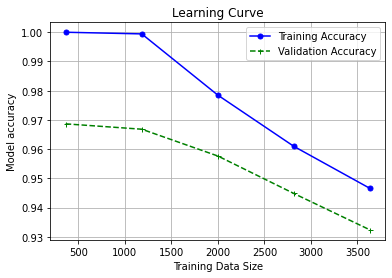

In [ ]:
plot_learning_curve(grid_search_extrtrees_clf.best_estimator_, X,y)

As per the learning curve model seems to overfit the data

Let us try extra trees on feature selected dataset

#### Extra-trees on selected features

#### Training and hyperparameter tuning

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

fs_extrtrees_clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [500, 750, 1000], "max_leaf_nodes" : [16, 32, 64], "class_weight":["balanced"], "ccp_alpha" :np.arange(0.0, 0.01, 0.005)}
fs_grid_search_extrtrees_clf = GridSearchCV(fs_extrtrees_clf, params, n_jobs=-1, cv=5, scoring="accuracy")
fs_grid_search_extrtrees_clf.fit(fs_X,y)
print("best params from grid search for extra-trees classifier are: ", fs_grid_search_extrtrees_clf.best_params_)
print("Best estimator is:", fs_grid_search_extrtrees_clf.best_estimator_)


best params from grid search for extra-trees classifier are:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_leaf_nodes': 64, 'n_estimators': 750}
Best estimator is: ExtraTreesClassifier(class_weight='balanced', max_leaf_nodes=64,
                     n_estimators=750, n_jobs=-1, random_state=42)


#### Evaluation over training set

In [ ]:
print("***Performance stats for Extra-trees Classifier over training data***")
calculate_model_stats(fs_grid_search_extrtrees_clf.best_estimator_,fs_X,y, "fs_ext_trees", True)

***Performance stats for Extra-trees Classifier over training data***
accuracy: 0.9264894592117323
 ROC AUC Score:  0.9879206202965437
 Precision score:  0.3022847100175747
Recall score: 0.9772727272727273
F1 score: 0.461744966442953

 confusion matrix
[[4882  397]
 [   4  172]]


#### Evaluation over test set

***Performance stats for Extra-trees Classifier over testing data reduced***
 ROC AUC Score:  0.9338154269972452


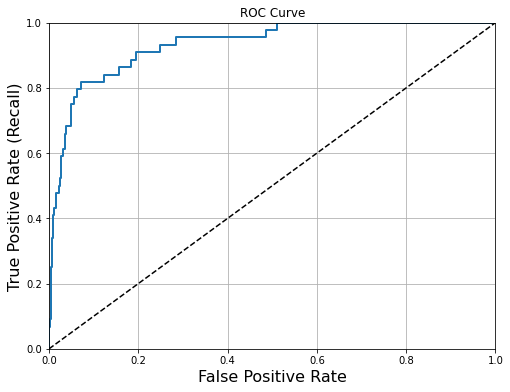

accuracy: 0.9222873900293255
 ROC AUC Score:  0.9338154269972452
 Precision score:  0.26865671641791045
Recall score: 0.8181818181818182
F1 score: 0.4044943820224719

 confusion matrix
[[1222   98]
 [   8   36]]


In [ ]:
print("***Performance stats for Extra-trees Classifier over testing data reduced***")
calculate_model_stats(fs_grid_search_extrtrees_clf.best_estimator_, fs_X_test,y_test, "fs_ext_trees", False)

#### Learning Curves

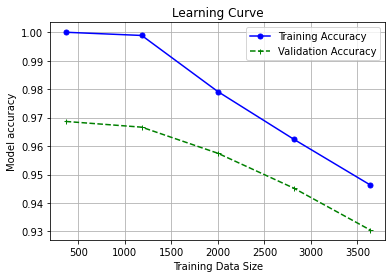

In [ ]:
plot_learning_curve(fs_grid_search_extrtrees_clf.best_estimator_, fs_X,y)

## Bagging and Pasting Classifier

Sampling with replacement- bagging
'bootstrap_features': [True]

Sampling without replacement- pasting

out of bag evaluation: oob

#### Training and hyperparameter tuning

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bc_params = { 'bootstrap_features': [False],
    'n_estimators': [500,750,1000],'max_samples':[250],
    'oob_score': [False]
}

grid_srch_bag_clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params,scoring="recall", cv=3, verbose=1, n_jobs=-1)
grid_srch_bag_clf.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap_features': [False], 'max_samples': [250],
                         'n_estimators': [500, 750, 1000],
                         'oob_score': [False]},
             scoring='recall', verbose=1)

In [ ]:
print("best estimator is: ", grid_srch_bag_clf.best_estimator_)
print("best params are: ", grid_srch_bag_clf.best_params_)

best estimator is:  BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=250,
                  n_estimators=750)
best params are:  {'bootstrap_features': False, 'max_samples': 250, 'n_estimators': 750, 'oob_score': False}


#### Evaluation over training set

In [ ]:
print("***Performance stats for Gradient Boosting Classifier over training data***")
calculate_model_stats(grid_srch_bag_clf.best_estimator_,X,y, "bagging clf", True)

***Performance stats for Gradient Boosting Classifier over training data***
accuracy: 0.9695692025664528
 ROC AUC Score:  0.9607568151681619
 Precision score:  0.6923076923076923
Recall score: 0.10227272727272728
F1 score: 0.17821782178217824

 confusion matrix
[[5271    8]
 [ 158   18]]


#### Evaluation over test set

***Performance stats for Gradient Boosting Classifier over test data***
 ROC AUC Score:  0.9227617079889807


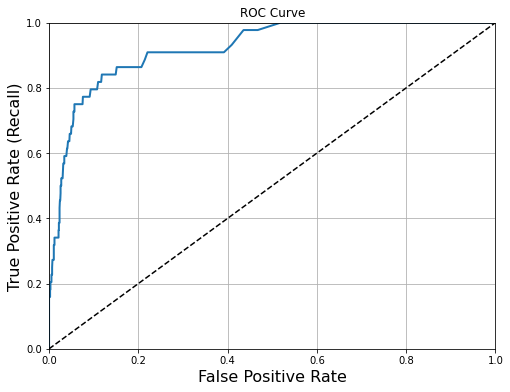

accuracy: 0.9721407624633431
 ROC AUC Score:  0.9227617079889807
 Precision score:  1.0
Recall score: 0.13636363636363635
F1 score: 0.24000000000000002

 confusion matrix
[[1320    0]
 [  38    6]]


In [ ]:
print("***Performance stats for Gradient Boosting Classifier over test data***")
calculate_model_stats(grid_srch_bag_clf.best_estimator_,X_test,y_test, "bagging clf", False)

#### Learning Curves

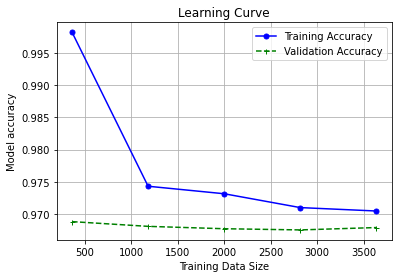

In [ ]:
plot_learning_curve(grid_srch_bag_clf.best_estimator_, X,y)

## k-Nearest Neighbors (k-NN) Classifier

KNN algorithm works to classify new data based on its proximity to K-neighbors (training data)

p = 1 --> Manhattan distance p = 2 --> Euclidean


#### Training and hyperparameter tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(6,20,2),'p': [1,2]}
gridsearch_kNN = GridSearchCV(knn, knn_params, cv=5, scoring='recall', return_train_score=False,verbose=1)
gridsearch_kNN.fit(X, y)
print("best estimator is: ", gridsearch_kNN.best_estimator_)
print("best params are: ", gridsearch_kNN.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
best estimator is:  KNeighborsClassifier(n_neighbors=8, p=1)
best params are:  {'n_neighbors': 8, 'p': 1}


#### Evaluation over training set

In [ ]:
print("***Performance stats for k-NN Classifier over train data***")
calculate_model_stats(gridsearch_kNN.best_estimator_,X,y, "k-NN", True)

***Performance stats for k-NN Classifier over train data***
accuracy: 0.9684692942254812
 ROC AUC Score:  0.9718992706952074
 Precision score:  0.8333333333333334
Recall score: 0.028409090909090908
F1 score: 0.05494505494505494

 confusion matrix
[[5278    1]
 [ 171    5]]


#### Evaluation over test set

***Performance stats for k-NN Classifier over test data***
 ROC AUC Score:  0.8215909090909091


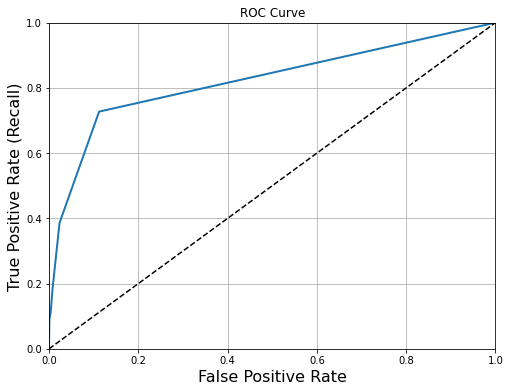

accuracy: 0.9699413489736071
 ROC AUC Score:  0.8215909090909091
 Precision score:  0.8
Recall score: 0.09090909090909091
F1 score: 0.163265306122449

 confusion matrix
[[1319    1]
 [  40    4]]


In [ ]:
print("***Performance stats for k-NN Classifier over test data***")
calculate_model_stats(gridsearch_kNN.best_estimator_,X_test,y_test, "k-NN", False)

KNN works well with a small number of input variables, but struggles when the number of inputs is very large. 

Irrespective of high accuracy this is a really bad fit as the recall is extremely low

#### Learning Curves

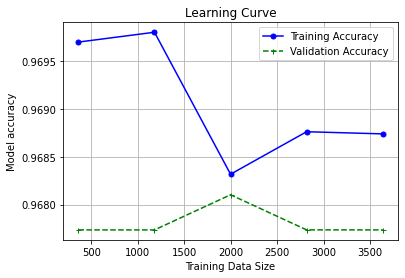

In [ ]:
plot_learning_curve(gridsearch_kNN.best_estimator_, X,y)

Learning curve depicts overfitting which is quite evident

## Voting Classifiers

We will use the best estimators from the previously defined classifiers and aggregate the predictions of each classifier

#### Hard Voting Classification

In [ ]:
#hard-voting classifier
from sklearn.ensemble import VotingClassifier
logreg = rnd_search_log_reg.best_estimator_
svm = rnd_search_svm.best_estimator_
rnd = grid_search_rnd_clf.best_estimator_
adab = grid_search_adaboost.best_estimator_
gbst = grid_search_gboost.best_estimator_
exttrees = grid_search_extrtrees_clf.best_estimator_

hard_voting_clf = VotingClassifier(
    estimators=[('log reg', logreg), ('svm', svm), ('rnd', rnd), ('exttrees', exttrees)],
    voting='hard')
hard_voting_clf.fit(X, y)

hard_val_pred = hard_voting_clf.predict(X_test)

#### Evaluation over test set

In [ ]:
print("***Performance stats for hard Voting Classifier over test data***")
print(confusion_matrix(y_test, hard_val_pred))
print(classification_report(y_test, hard_val_pred))

***Performance stats for hard Voting Classifier over test data***
[[1209  111]
 [   8   36]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.24      0.82      0.38        44

    accuracy                           0.91      1364
   macro avg       0.62      0.87      0.67      1364
weighted avg       0.97      0.91      0.93      1364



predict_proba is not available when voting='hard'

#### Soft Voting Classification

In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[('log reg', logreg), ('svm', svm), ('rnd', rnd), ('exttrees', exttrees)],
    voting='soft')
soft_voting_clf.fit(X, y)

VotingClassifier(estimators=[('log reg',
                              LogisticRegression(C=0.17787658410143284,
                                                 class_weight='balanced',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('svm',
                              SVC(C=33.47086111390219, class_weight='balanced',
                                  gamma=0.005180051644243019, probability=True,
                                  random_state=42)),
                             ('rnd',
                              RandomForestClassifier(ccp_alpha=0.005,
                                                     class_weight='balanced',
                                                     max_leaf_nodes=16,
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                 

#### Evaluation over test set

***Performance stats for Soft voting Classifier over test data***
 ROC AUC Score:  0.9393939393939393


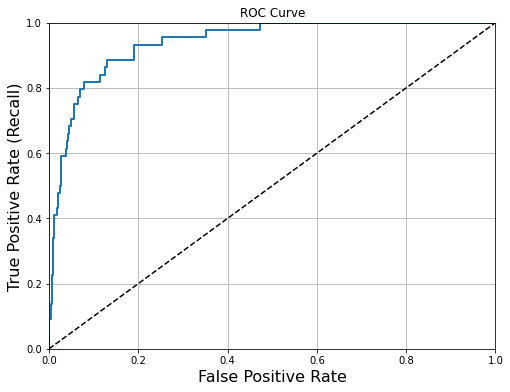

accuracy: 0.9398826979472141
 ROC AUC Score:  0.9393939393939393
 Precision score:  0.31
Recall score: 0.7045454545454546
F1 score: 0.4305555555555555

 confusion matrix
[[1251   69]
 [  13   31]]


In [ ]:
print("***Performance stats for Soft voting Classifier over test data***")
calculate_model_stats(soft_voting_clf,X_test,y_test, "soft voting", False)

#### Learning Curves

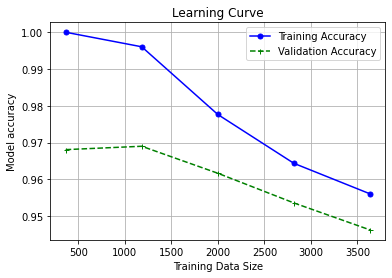

In [ ]:
plot_learning_curve(soft_voting_clf, X,y)

# Summary of results

We present below a summary of results



## Summarizing learning curves


Learning curves are used to check for model overfitting. Looking at the previous sections, given below is a summary of overfit/underfit.

*   AdaBoost has the most overfitting but also gives high accuracy on validation set. There is some overfitting in Random  Forest though not as bad. Accuracy on validation set is low for AdaBoost and Random Forest. 
*   SVM, Gradient Boosting and Logistic regression do not overfit. Logistic regression and SVM give similar accuracy on validation set.
*   Extra- trees also suggest overfitting

## Performance comparison on test data
Below is a summary of performance metrics for the classifiers over test data.

In [ ]:
test_stats_df

,Accuracy,ROC AUC,Precision,Recall,f1_score
log reg,0.858504,0.934229,0.168889,0.863636,0.282528
svm,0.857038,0.937138,0.167401,0.863636,0.280443
svm (with pca),0.843842,0.928994,0.152263,0.840909,0.257840
rnd_forest,0.916422,0.938499,0.242647,0.750000,0.366667
ada_boost,0.929619,0.909229,0.250000,0.590909,0.351351
grad_boost,0.899560,0.935201,0.211180,0.772727,0.331707
fs_logreg,0.868035,0.935658,0.179245,0.863636,0.296875
fs_svm,0.856305,0.937638,0.166667,0.863636,0.279412
fs_ext_trees,0.922287,0.933815,0.268657,0.818182,0.404494
bagging clf,0.972141,0.922762,1.000000,0.136364,0.240000


## Conclusion

Looking at the results overall, SVM has a high recall on test set, does not overfit much, and has a high accuracy over validation and test set.

Soft voting provides the highest recall for the highest accuracy. K-NN comes out to be the worst performing model. 

Since recall is more important that accuracy for this problem, the best model is SVM (rbf kernel) or the feature selected SVM (rbf kernel) where we had done feature selection using random forests before applying SVM. This matches the best model identified in the paper from Liang et. al though they combined SDA (Stepwise discriminant analysis) with SVM. 



## Future


*   Neural network model like multilayer perceptron should be tested in this application.
*   More sample data will be useful to better evaluate the models. The data used for this project is collected over a range of 10 years (1999-2009). Perhaps, a wider range will be useful to build more robust models and better evaluate them.
*   Investing in computing resource might be useful to try out a broader range for hypeparameters for ensemble methods and neural networks.



